In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing,svm,datasets

# Dla indeksu 233013

In [2]:
IDX = [2,3,3,0,1,3]

In [3]:
def convert(list): 
    # Converting integer list to string list 
    s = [str(i) for i in list] 
    # Join list items using join() 
    res = int("".join(s)) 
    return(res) 

In [4]:
samples,labels = sklearn.datasets.make_gaussian_quantiles( mean=(IDX[2]/1,IDX[4]/IDX[5]), cov= IDX[4]/1, n_samples= convert(IDX)//convert(IDX[::2]),
                                         n_features=2, n_classes=2, 
                                         shuffle=True, random_state=None)

In [5]:
samples_df = pd.DataFrame(samples)
labels_df = pd.DataFrame(labels)
labels_df

,0
0,1
1,1
2,0
3,1
4,1
...,...
1003,0
1004,0
1005,0
1006,1


In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
samples_scaled = min_max_scaler.fit_transform(samples_df)
normalized_samples = pd.DataFrame(samples_scaled)
normalized_samples

,0,1
0,0.701216,0.548416
1,0.439603,0.356594
2,0.444523,0.711050
3,0.614991,0.994130
4,0.120615,0.904293
...,...,...
1003,0.434790,0.576118
1004,0.418446,0.540684
1005,0.471226,0.472775
1006,0.813978,0.338104


In [7]:
normalized_samples[0]

0       0.701216
1       0.439603
2       0.444523
3       0.614991
4       0.120615
          ...   
1003    0.434790
1004    0.418446
1005    0.471226
1006    0.813978
1007    0.758761
Name: 0, Length: 1008, dtype: float64

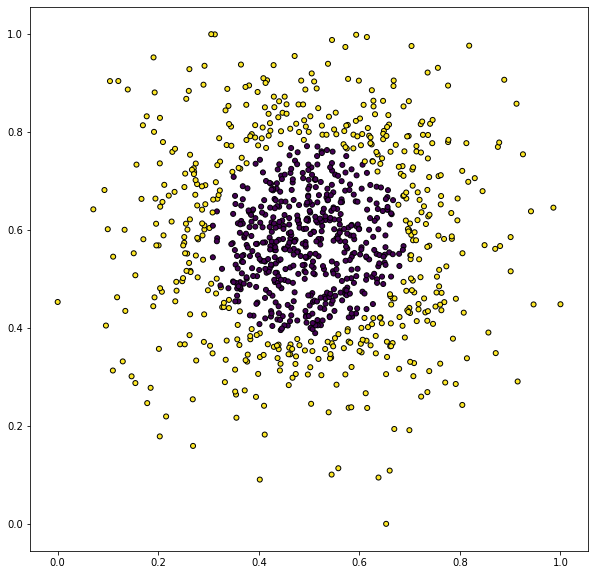

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(normalized_samples[0], normalized_samples[1], marker='o', c=labels,
            s=25, edgecolor='k')
plt.show()

In [9]:
def Modele():
    C = [1,10,100,1000]  #współczynnik regularyzacji
    kernel = [ "linear", "poly", "rbf", "sigmoid"] #funkcje jadra
    lista_modeli = []
    
    
    for i in kernel:
        for c in C:
            SVC = svm.SVC(C = c, kernel = i)
            SVC.fit(normalized_samples,labels)
            lista_modeli.append(SVC)
            
    return lista_modeli

In [10]:
lista_modeli = Modele() #lista nauczonych modeli

In [11]:
lista_modeli

[SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
  

In [12]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


In [13]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [14]:
titles=["c1 linear","c10 linear","c100 linear","c1000 linear",
        "c1 poly","c10 poly","c100 poly","c1000 poly",
        "c1 rbf","c10 rbf","c100 rbf","c1000 rbf",
        "c1 sigmoid","c10 sigmoid","c100 sigmoid","c1000 sigmoid"]

models = lista_modeli
models

[SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
  

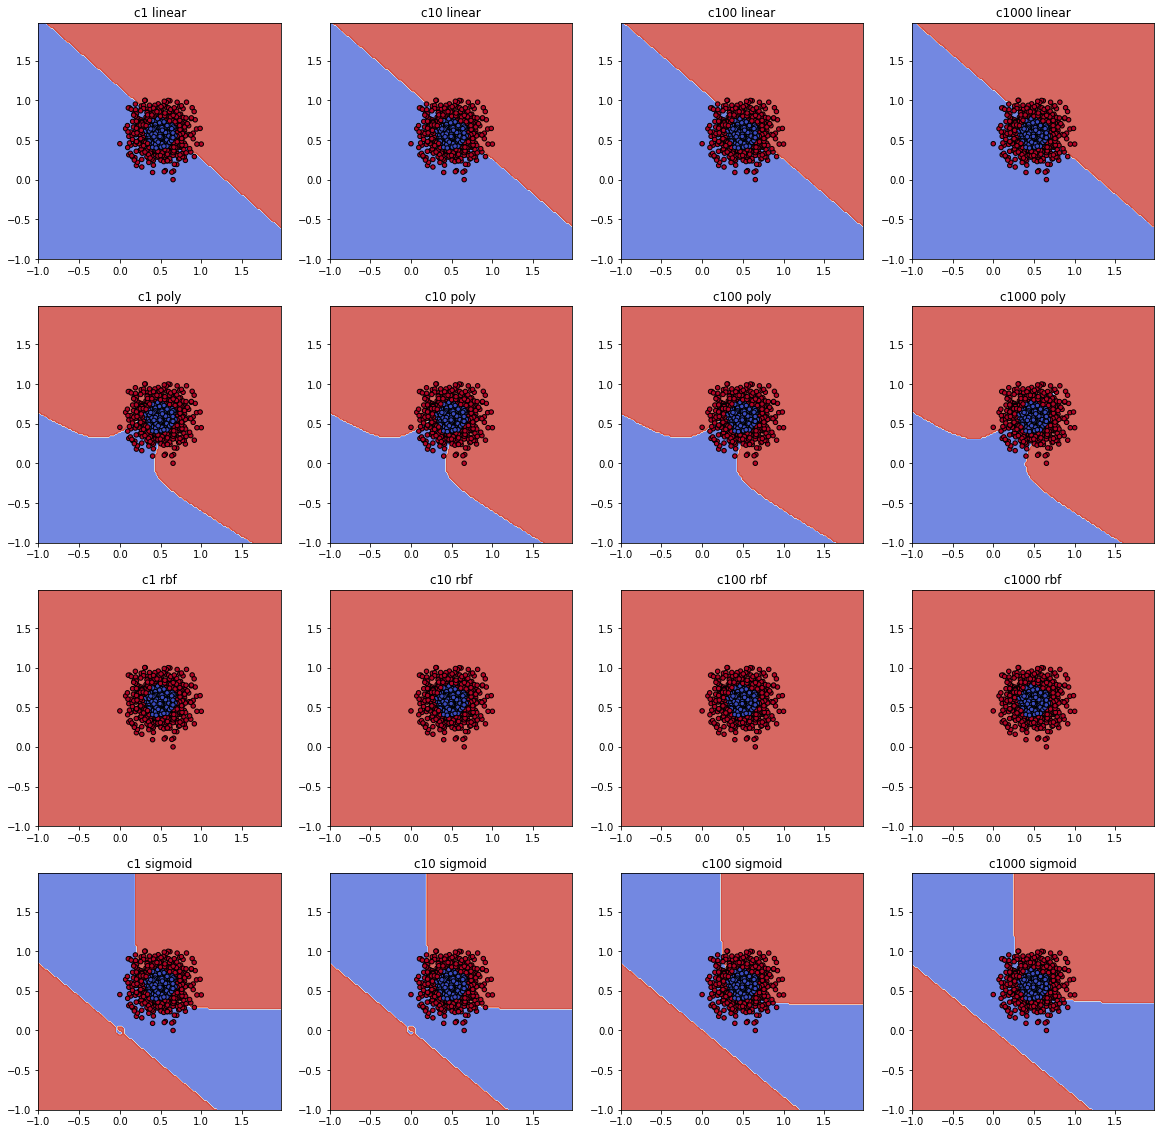

In [15]:
fig, sub = plt.subplots(4, 4, figsize=(20,20))

x0, x1 = normalized_samples[0], normalized_samples[1]
xx, yy = make_meshgrid(x0, x1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(x0, x1, c=labels, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_title(title)
    
plt.show()

# Wnioski i obserwacje
Zmiana parametru regularyzacji w przypadku funkcji jądra linearnej oraz rbf nie ma żadnego wpływu na predykcję.
W przypadku jądra z funkcją sigmoidalną - widać lekkie zaokrąglenie obszarów rozpoznanych przez funkcję.

Zmiana funkcji jądra ma istotny wpływ na rozpoznanie klasy punktów, najdokładniejsza jest jądro z funkcją rbf oraz jądro z funkcją poly. Jądro z funkcją linear oraz sigmoid, zaznaczają obszar szukanej klasy, ale biorą dużo próbek z drugiej klasy.


In [16]:
Dataset = pd.read_csv("HTRU_2.csv", names = ["Feature1","Feature2","Feature3","Feature4","Feature5","Feature6","Feature7","Feature8","Class"])

In [17]:
Dataset

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [18]:
pd.isna(Dataset).sum() # Brak brakujących wartosci w kolumnach

Feature1    0
Feature2    0
Feature3    0
Feature4    0
Feature5    0
Feature6    0
Feature7    0
Feature8    0
Class       0
dtype: int64

In [19]:
Dataset_copy1 = Dataset.copy()
Dataset_copy2 = Dataset.copy()

In [20]:
Dataset_copy2

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [21]:
Dataset_copy1['Class'].sum()

1639

In [22]:
   def mod_outlier(df):                             #liczenie IQR
        df1 = df.copy()
        df = df._get_numeric_data()


        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)
        
        iqr = q3 - q1
        display(iqr)

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]  


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

In [23]:
odciete_klasy = Dataset_copy1.loc[:,'Class']
display(odciete_klasy)

0        0
1        0
2        0
3        0
4        0
        ..
17893    0
17894    0
17895    0
17896    0
17897    0
Name: Class, Length: 17898, dtype: int64

In [24]:
Dataset_copy1 = Dataset_copy1.loc[:,['Feature1','Feature2','Feature3','Feature4','Feature5','Feature6','Feature7','Feature8']]
display(Dataset_copy1)
odcieta_data = mod_outlier(Dataset_copy1)

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910


Feature1     26.156250
Feature2      8.647184
Feature3      0.446227
Feature4      1.116355
Feature5      3.541179
Feature6     13.990773
Feature7      4.921454
Feature8    104.348826
dtype: float64

In [25]:
odcieta_data

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022
17894,122.554688,49.485605,0.127978,0.323061,10.776024,44.626893,2.945244,8.297092
17895,119.335938,59.935939,0.159363,-0.743025,10.776024,49.414263,2.499517,4.595173
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910


In [ ]:
odcieta_data = odcieta_data.join(odciete_klasy)

In [30]:
min_max_scaler = preprocessing.MinMaxScaler()

odciete_scaled = min_max_scaler.fit_transform(odcieta_data)
odciete_samples = pd.DataFrame(odciete_scaled)

full_scaled = min_max_scaler.fit_transform(Dataset_copy2)
full_samples = pd.DataFrame(full_scaled)

In [31]:
odciete_samples.columns = ['Feature1','Feature2','Feature3','Feature4','Feature5','Feature6','Feature7','Feature8','Klasa']
full_samples.columns = ['Feature1','Feature2','Feature3','Feature4','Feature5','Feature6','Feature7','Feature8','Klasa']
#
#o
#o
#
#odciete_train_test= odciete_samples.loc[:,['Feature1','Feature2','Feature3','Feature4','Feature5','Feature6','Feature7','Feature8']]  #odcięte klasy
#full_train_test= full_samples.loc[:,['Feature1','Feature2','Feature3','Feature4','Feature5','Feature6','Feature7','Feature8']]        #odcięte klasy

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_cut,test_cut = train_test_split(odciete_samples, train_size =1000, test_size = 500)

train_full, test_full = train_test_split(full_samples, train_size =1000, test_size = 500)

In [34]:
odciete_klasy_train_cut = train_cut.loc[:,['Klasa']]
odciete_klasy_train_full = train_full.loc[:,['Klasa']]

train_cut = train_cut.loc[:,['Feature1','Feature2','Feature3','Feature4','Feature5','Feature6','Feature7','Feature8']]        #odcięte klasy
train_full = train_full.loc[:,['Feature1','Feature2','Feature3','Feature4','Feature5','Feature6','Feature7','Feature8']]        #odcięte klasy


odciete_klasy_test_cut = test_cut.loc[:,['Klasa']]
odciete_klasy_test_full = test_full.loc[:,['Klasa']]


test_cut = test_cut.loc[:,['Feature1','Feature2','Feature3','Feature4','Feature5','Feature6','Feature7','Feature8']]        #odcięte klasy
test_full = test_full.loc[:,['Feature1','Feature2','Feature3','Feature4','Feature5','Feature6','Feature7','Feature8']]        #odcięte klasy

In [35]:
display(test_full)

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8
4464,0.013592,0.168420,0.699235,0.395104,0.594604,0.647792,0.082112,0.000460
3237,0.682322,0.530437,0.178739,0.009202,0.231247,0.772892,0.116965,0.001537
5277,0.607963,0.313607,0.202082,0.027259,0.027798,0.216876,0.223083,0.025379
826,0.716156,0.390155,0.187671,0.022357,0.043267,0.284990,0.187618,0.014037
4369,0.599389,0.513982,0.202071,0.012524,0.015705,0.139959,0.262201,0.042936
...,...,...,...,...,...,...,...,...
17614,0.576847,0.298466,0.213007,0.030974,0.005590,0.048699,0.432895,0.180922
5725,0.243361,0.245956,0.511962,0.177868,0.243794,0.626885,0.114592,0.001835
16716,0.489649,0.265058,0.221229,0.034266,0.005046,0.049138,0.427362,0.170366
1396,0.673079,0.273447,0.176087,0.025548,0.010216,0.077406,0.328210,0.090986


In [36]:
display(odciete_klasy_train_cut)

,Klasa
14035,0.0
12524,0.0
6794,0.0
1026,0.0
11573,1.0
...,...
16205,0.0
8958,0.0
7797,0.0
4170,0.0


In [51]:
def Modele2():
    C = [1,1000]  #współczynnik regularyzacji
    kernel = [ "linear", "rbf"] #funkcje jadra
    lista_modeli = []
    
    
    for i in kernel:
        for c in C:
            SVC = svm.SVC(C = c, kernel = i,probability=True)
            SVC.fit(train_cut.values,odciete_klasy_train_cut.values)
            lista_modeli.append(SVC)
            
    return lista_modeli

In [52]:
def Modele3():
    C = [1,1000]  #współczynnik regularyzacji
    kernel = [ "linear", "rbf"] #funkcje jadra
    lista_modeli = []
    
    
    for i in kernel:
        for c in C:
            SVC = svm.SVC(C = c, kernel = i,probability=True)
            SVC.fit(train_full.values,odciete_klasy_train_full.values)
            lista_modeli.append(SVC)
            
    return lista_modeli

In [53]:
lista_modeli_cut = Modele2()
lista_modeli_full = Modele3()

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [55]:
lista_modeli_cut

[SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
     max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
     verbose=False),
 SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
     max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
     verbose=False),
 SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
     verbose=False),
 SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
 

In [41]:
predykcje_linear_c1  = lista_modeli_full[0].predict(test_cut)
predykcje_linear_c1000  = lista_modeli_full[1].predict(test_cut)
predykcje_rbf_c1     = lista_modeli_full[2].predict(test_cut)
predykcje_rbf_c1000  = lista_modeli_full[3].predict(test_cut)

predykcje_linear_c1full  = lista_modeli_cut[0].predict(test_full)
predykcje_linear_c1000full = lista_modeli_cut[1].predict(test_full)
predykcje_rbf_c1full  = lista_modeli_cut[2].predict(test_full)
predykcje_rbf_c1000full  = lista_modeli_cut[3].predict(test_full)

In [42]:
lista_accurancy = []


lista_accurancy.append(lista_modeli_full[0].score(test_full,odciete_klasy_test_full))
lista_accurancy.append(lista_modeli_full[1].score(test_full,odciete_klasy_test_full))
lista_accurancy.append(lista_modeli_full[2].score(test_full,odciete_klasy_test_full))
lista_accurancy.append(lista_modeli_full[3].score(test_full,odciete_klasy_test_full))

lista_accurancy.append(lista_modeli_cut[0].score(test_cut,odciete_klasy_test_cut))
lista_accurancy.append(lista_modeli_cut[1].score(test_cut,odciete_klasy_test_cut))
lista_accurancy.append(lista_modeli_cut[2].score(test_cut,odciete_klasy_test_cut))
lista_accurancy.append(lista_modeli_cut[3].score(test_cut,odciete_klasy_test_cut))
lista_accurancy

[0.978, 0.984, 0.984, 0.98, 0.968, 0.972, 0.962, 0.962]

In [43]:

lista_roznic = []
lista_roznic.append((lista_accurancy[4]-lista_accurancy[0])*100)
lista_roznic.append((lista_accurancy[5]-lista_accurancy[1])*100)
lista_roznic.append((lista_accurancy[6]-lista_accurancy[2])*100)
lista_roznic.append((lista_accurancy[7]-lista_accurancy[3])*100)
lista_roznic

[-1.0000000000000009,
 -1.200000000000001,
 -2.200000000000002,
 -1.8000000000000016]

In [44]:
#najlepsze accurency maja modele z nie odciętymi anomaliami,C nie mialo tutaj wplywu na dokladnosc funkcji z linear core, i lekki wplyw na rbf
#niezaleznie od wybranego modelu accurancy sa dosc podobne wybiore w takim razie model z RBF, C =1
# Wysokie accurancy wszystkich modeli może wynikac rowniez z problematycznego faktu bardzo nierównych obecnosci jednej i drugiej klasy.

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predykcje_rbf_c1, odciete_klasy_test_cut, normalize = 'true')

array([[0.91222571, 0.08777429],
       [0.93370166, 0.06629834]])

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [47]:
Pp_full = lista_modeli_full[2].predict_proba(test_full.values)
Pp_cut = lista_modeli_cut[2].predict_proba(test_cut.values)
Pp_full = Pp_full[:,1]
Pp_cut = Pp_cut[:,1]

In [48]:
test_full.shape

(500, 8)

0.931916971916972 0.892663043478261


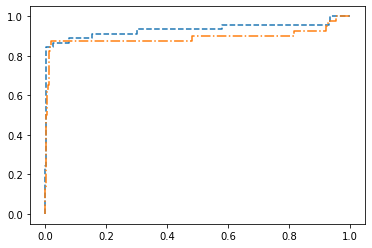

In [49]:
Pp_full_auc = roc_auc_score(odciete_klasy_test_full,Pp_full)
Pp_cut_auc = roc_auc_score(odciete_klasy_test_cut,Pp_cut)

X, Y, _ = roc_curve(odciete_klasy_test_full, Pp_full)
X1,Y1, _ =roc_curve(odciete_klasy_test_cut, Pp_cut)



plt.plot(X,Y,linestyle= "--",label = "Full")
plt.plot(X1,Y1, linestyle = "dashdot", label = "Ciete")
print(Pp_full_auc,Pp_cut_auc)